# ***Importing data***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Classification_train.csv')

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#importing dataset

x = data.iloc[:20000,1:785].values

y = data.iloc[:20000,0].values
y=y[np.newaxis,:] #y = y.reshape(y.shape[0],1)
y=y.T

In [ ]:
m, n = x.shape
x.shape,y.shape

((20000, 784), (20000, 1))

# ***Pre-Processing of data***

In [ ]:
X_norm = x/255
X=X_norm
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x1=np.ones((m,1))
x1.shape

(20000, 1)

In [ ]:
X=np.concatenate((x1,X),axis=1)
X.shape,X

((20000, 785),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]))

In [ ]:
""" Y: onehot encoded """
unique_values=(np.unique(y))
Y=np.zeros((m,len(unique_values)))
for i in range(m):
    for j in range(len(unique_values)):
        if y[i][0]==unique_values[j]: Y[i][unique_values[j]]=1

# ***Cost function***

In [ ]:
def sigmoid(z):

    g=1/(1+(np.exp(-z)))

    return g

In [ ]:
def prediction(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

In [ ]:
def cost_function(theta, X, Y):
    m = X.shape[0]
    y_hat = prediction(X, theta)
    return -(1/m) * (np.sum(Y*np.log(y_hat) + (1-Y)*np.log(1-y_hat)))

In [ ]:
def gradient(theta, X, Y):
    m = X.shape[0]
    y_hat = prediction(X, theta)
    return (1/m) * np.dot(X.T, y_hat - Y)

# ***Updating Parameters***

In [ ]:
def gradient_descent(X, Y, max_iter, eta):

    cost_list = []
    theta = (np.random.randn(785, 10))*0.01

    for i in range(max_iter):
        theta= theta - eta * gradient(theta, X, Y)

        cost = cost_function(theta, X, Y)


        cost_list.append(cost)

        if(i%(max_iter/10) == 0):
            print("Cost after", i, "iterations is :", cost)




    return theta,cost_list

In [ ]:
max_iter=1000
eta=0.01
theta_final,cost_list=gradient_descent(X, Y, max_iter, eta)
theta_final.shape

Cost after 0 iterations is : 6.714661801072694
Cost after 100 iterations is : 2.772866963087103
Cost after 200 iterations is : 2.2847318384604396
Cost after 300 iterations is : 1.9804771453345391
Cost after 400 iterations is : 1.7681673075337754
Cost after 500 iterations is : 1.612211805802549
Cost after 600 iterations is : 1.4927475086702044
Cost after 700 iterations is : 1.3980669957980383
Cost after 800 iterations is : 1.3209414143987117
Cost after 900 iterations is : 1.2567013976326347


(785, 10)

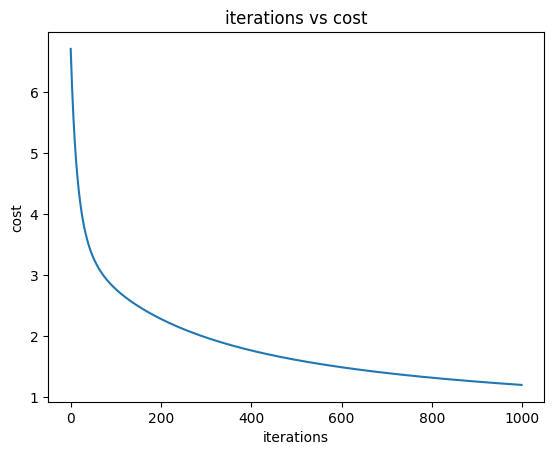

In [ ]:
t = np.arange(0, max_iter)
plt.plot(t,cost_list)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("iterations vs cost")

plt.show()

# ***Accuracy on train data***

In [ ]:
Z=prediction(X, theta_final)
Z.shape

(20000, 10)

In [ ]:
pred=np.argmax(Z, axis=1)

In [ ]:
count=0
for i in range(m):

    if y[i,0] ==pred[i]:
        count+=1
print(count)

18097


In [ ]:
accuracy=(count/m)*100
print('Accuracy on test data = '+str(math.ceil(accuracy))+'%')
print('Accuracy on test data = '+str(round(accuracy,2))+'%')

Accuracy on test data = 91%
Accuracy on test data = 90.48%


# ***Accuracy on test data***

In [ ]:
x_test = data.iloc[20000:,1:785].values

y_test = data.iloc[20000:,0].values
y_test = y_test.reshape(y_test.shape[0],1)
m_test,n_test=x_test.shape
x_test.shape

(10000, 784)

In [ ]:
x_test_norm = x_test/255
X1 = x_test_norm

In [ ]:

x2=np.ones((m_test,1))
x_test=np.concatenate((x2,X1),axis=1)
x_test.shape

(10000, 785)

In [ ]:
Z_test=prediction(x_test, theta_final)
Z_test.shape

(10000, 10)

In [ ]:
pred_test=np.argmax(Z_test, axis=1)

In [ ]:
count=0
for i in range(m_test):

    if y_test[i,0] ==pred_test[i]:
        count+=1
print(count)

9037


In [ ]:
accuracy=(count/m_test)*100
print('Accuracy on test data = '+str(math.ceil(accuracy))+'%')
print('Accuracy on test data = '+str(round(accuracy,2))+'%')

Accuracy on test data = 91%
Accuracy on test data = 90.37%


# ***Finding labels for classification_test***

In [ ]:
#importing dataset
data_pred = pd.read_csv('/content/drive/MyDrive/Dataset/Classification_test.csv')
x_pred = data_pred.iloc[:,1:785].values
x_pred.shape
m_pred,n_pred=x_pred.shape

In [ ]:
x_pred = x_pred/255
x_pred.shape

(10000, 784)

In [ ]:
data_pred.shape


(10000, 785)

In [ ]:

x2=np.ones((m_pred,1))
x2.shape

(10000, 1)

In [ ]:
x_pred=np.concatenate((x2,x_pred),axis=1)
x_pred.shape

(10000, 785)

In [ ]:
Z_test=prediction(x_pred, theta_final)
Z_test.shape

(10000, 10)

In [ ]:
pred_test=np.argmax(Z_test, axis=1)
pred_test


array([1, 4, 1, ..., 1, 1, 1])

In [ ]:
pred_test=pred_test[np.newaxis,:]
pred_test=pred_test.T
pred_test.shape

(10000, 1)

In [ ]:
data_pred.insert(0,'label',pred_test)

In [ ]:
#saving the dataframe as a csv file
data_pred.to_csv('Classification_test_pred.csv',index=False)